In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('/content/final_preprocessed_dataset.csv')
df = pd.read_csv("DATA/TRAINING DATASET/final_preprocessed_dataset_undersampling.csv")

df.head()

,created_at,full_text_processed,label
0,06/04/2025,besides issue genocide drc even years buy one,n
1,06/04/2025,anybody needs chip inserted brain named fafo s...,c
2,06/04/2025,pledged support justice dignity peace gaza joi...,c
3,06/04/2025,taking position gaza taking position gaza one ...,c
4,06/04/2025,children gaza stand proof world looked away do...,c


In [3]:
# Rename columns
df.rename(columns={'full_text_processed': 'text', 'label': 'label'}, inplace=True)
df.head()

,created_at,text,label
0,06/04/2025,besides issue genocide drc even years buy one,n
1,06/04/2025,anybody needs chip inserted brain named fafo s...,c
2,06/04/2025,pledged support justice dignity peace gaza joi...,c
3,06/04/2025,taking position gaza taking position gaza one ...,c
4,06/04/2025,children gaza stand proof world looked away do...,c


In [4]:
df = df.dropna(subset=['text', 'label'])

df.head()

,created_at,text,label
0,06/04/2025,besides issue genocide drc even years buy one,n
1,06/04/2025,anybody needs chip inserted brain named fafo s...,c
2,06/04/2025,pledged support justice dignity peace gaza joi...,c
3,06/04/2025,taking position gaza taking position gaza one ...,c
4,06/04/2025,children gaza stand proof world looked away do...,c


In [5]:
# Mapping label
label_map = {'p': 2, 'n': 1, 'c': 0}
df['label'] = df['label'].map(label_map)

df.head()

,created_at,text,label
0,06/04/2025,besides issue genocide drc even years buy one,NaN
1,06/04/2025,anybody needs chip inserted brain named fafo s...,0.0
2,06/04/2025,pledged support justice dignity peace gaza joi...,0.0
3,06/04/2025,taking position gaza taking position gaza one ...,0.0
4,06/04/2025,children gaza stand proof world looked away do...,0.0


In [6]:
# Hapus yang gagal map
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)


In [7]:
df.shape

(1470, 3)

Tokenisasi

In [8]:
texts = df['text'].astype(str).tolist()
labels = df['label'].values

In [9]:
# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
tokenizer.document_count

1470

padding

In [108]:
# # Max Len in X_train_sequences
# maxlen = max(len(tokens) for tokens in X_train_sequences)
# print("Maximum sequence length (maxlen):", maxlen)

In [11]:
maxlen = 70
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42, stratify=labels)

In [13]:
vocab_size = len(tokenizer.word_index) + 1  # +1 untuk padding

Build Model

In [14]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ini yang akan keluarin isi summary:
model.build(input_shape=(None, maxlen))
model.summary()


d:\1 KULIAH\TUGAS AKHIR\Skripsi\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 70, 128)        │       701,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755,331 (2.88 MB)

 Trainable params: 755,331 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.3207 - loss: 1.1005 - val_accuracy: 0.3008 - val_loss: 1.1021
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.3500 - loss: 1.0987 - val_accuracy: 0.3008 - val_loss: 1.0998
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.3265 - loss: 1.1005 - val_accuracy: 0.3008 - val_loss: 1.1020
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.3320 - loss: 1.1022 - val_accuracy: 0.3305 - val_loss: 1.1016
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.3081 - loss: 1.0999 - val_accuracy: 0.3008 - val_loss: 1.0997
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.3669 - loss: 1.0980 - val_accuracy: 0.3305 - val_loss: 1.0981
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.3398 - loss: 1.1000 - val_accuracy: 0.3008 - val_loss: 1.1015
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.3402 - loss: 1.0976 - val_accuracy: 0

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3222 - loss: 1.0984

Test Accuracy: 0.3333


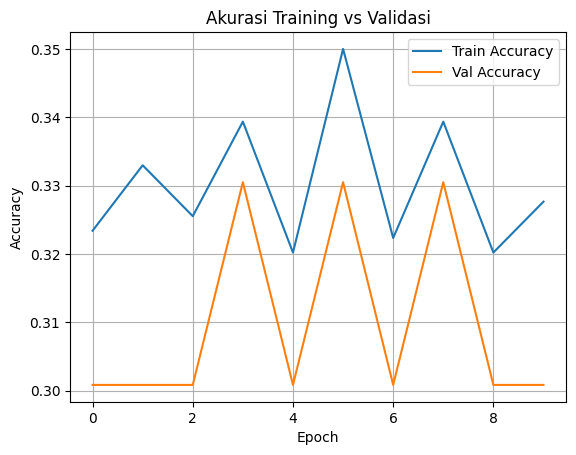

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Akurasi Training vs Validasi')
plt.grid(True)
plt.show()

Skip

In [69]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [71]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [72]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 310  396   14 ...    0    0    0]
 [2924 1149   90 ...    0    0    0]
 [1911  398 1912 ...    0    0    0]
 ...
 [   5  438  370 ...    0    0    0]
 [   2  252 1367 ...    0    0    0]
 [1088 6061 6062 ...    0    0    0]]

X_test_padded:
[[ 127 1194 1037 ...    0    0    0]
 [ 795  906 2760 ...    0    0    0]
 [1277 1367 6068 ...    0    0    0]
 ...
 [2700  973   49 ...    0    0    0]
 [   7  169  169 ...    0    0    0]
 [ 163  389 1509 ...    0    0    0]]


In [74]:
# Input Size
# Embedding Input Size / Vocabulary Size 
input_Size = int(np.max(X_train_padded)) + 1
input_Size

6064

In [75]:
model = Sequential()

model.add(LSTM(256, input_shape=(75,1), return_sequences=True))  

model.add(LSTM(128)) 

model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.01))

model.add(Dense(1, activation='sigmoid')) 

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 75, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,633 (1.79 MB)

 Trainable params: 469,633 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 359ms/step - accuracy: 0.4887 - loss: 0.1319 - val_accuracy: 0.5290 - val_loss: -0.1663
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 660ms/step - accuracy: 0.5035 - loss: 0.1173 - val_accuracy: 0.5290 - val_loss: -0.1748
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 428ms/step - accuracy: 0.4909 - loss: 0.1320 - val_accuracy: 0.5290 - val_loss: -0.1996
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.4939 - loss: -0.0370 - val_accuracy: 0.5290 - val_loss: -0.1974
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step - accuracy: 0.4973 - loss: 0.0465 - val_accuracy: 0.5290 - val_loss: -0.1788
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 467ms/step - accuracy: 0.5009 - loss: -0.0094 - val_accuracy: 0.5290 - val_loss: -0.1618
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 755ms/step - accuracy: 0.5010 - loss: 0.0544 - val_accuracy: 0.5290 - val_loss: -0.1482
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 387ms/step - accuracy: 0.4906 - loss: 0.0438 -

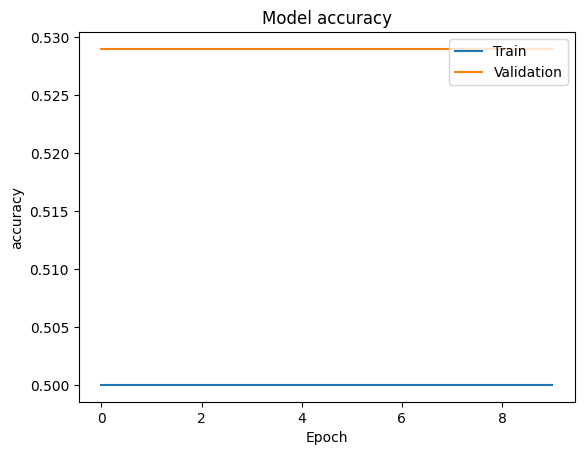

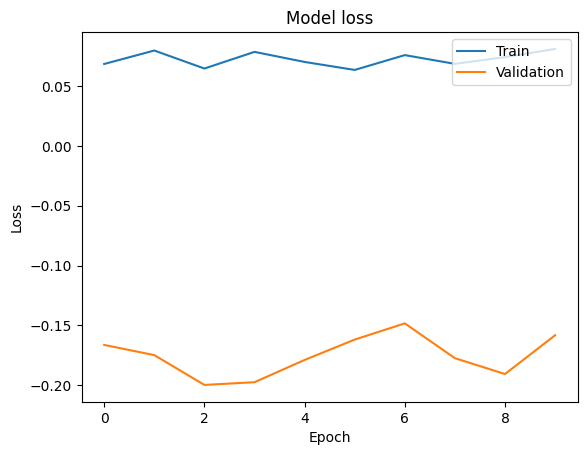

In [86]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [66]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)